In [ ]:
# 1 base de datos descargada o previamente conseguida ( de investing, a ver si podemos sacarla )
# 2 base de datos con webscrapping o api ( )

#1º lista de precios de los ultimos 6 meses, con maximo y minimo diario ideal con selenium poder preguntar sobre qué stock
# 2º algo que pueda tener incidencia, de la pagina de noticias, seleccionar ultimos 6 meses y quedarnos con las de una carácteristica

In [2]:
import pandas as pd
import os
import numpy as np
import requests
from dotenv import load_dotenv
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
import time



In [3]:

# elegimos con qué vamos a navegar, una vez hecho esto se nos abre una ventana de Chrome en este caso que nos advierte de que 
# algún programa maneja nuestro navegador, y en esa ventana se ejecutarán las acciones que vamos a ir haciendo.
# https://www.selenium.dev/documentation/es/getting_started/
driver = webdriver.Chrome()
driver.implicitly_wait(10)




In [3]:
urlprevia = "https://www.investing.com/equities/facebook-inc"
html = driver.get(urlprevia)
time.sleep (5)


In [9]:
# aqui estamos aceptamos las cookies, he intentado primero por nombre, con find element by link text, pero daba error, asi que 
# he buscado la id y la he pegado
url= driver.find_element_by_id("onetrust-accept-btn-handler").click() 
time.sleep (2)

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=89.0.4389.114)


In [8]:
#una vez en la ventana de Facebook, tenemos que irnos a historial data, que es lo que nos interesa:
driver.find_element_by_xpath("/html/body/div[1]/div/div/div[2]/main/div/div[3]/nav/ul/li[3]/a").click()
# después de varias pruebas fallidas, búsqueda por xpath y copiar directamente la ruta, con esto hemos clickado en historial data,
time.sleep (35)#vamos a darle tiempo, porque después de esto salta publicidad...

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div[1]/div/div/div[2]/main/div/div[3]/nav/ul/li[3]/a"}
  (Session info: chrome=89.0.4389.114)


In [10]:
#driver.find_element_by_xpath ("/html/body/div[6]/div[2]/i").click() #cerramos ventana de inicio sesion
time.sleep (2)
# OJO, ESTO TENGO QUE METERLO EN UN ERROR; PERO UWE SIGA RULANDO

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=89.0.4389.114)


In [11]:
#ahora tenemos que seleccionar el rango de fechas que queremos, por defecto viene un mes, y nos interesan 6 meses.
driver.find_element_by_xpath ("/html/body/div[5]/section/div[8]/div[3]/div/div[1]/div[1]/div").click()
#abro calendario
time.sleep (1)

In [12]:
# despues de intentarlo con datetime para crear una variable que sea la fecha menos 6 meses, me da error al rellenar con send_key
# porque lo que se pega es en formato datetime y el campo pide (dd/mm/yyyy), lo podría meter a mano, pero mejor coger una fecha
# que seguro que incluya el rango buscado y así tengo algo que limpiar en los df, porque voy a obtener todo bastante limpio ( si me sale bien)
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/div/a[1]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/div/a[1]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/div/a[1]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/div/a[1]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/div/a[1]/span").click() #5 clicks para que vaya corriendo mes en el calendario



In [13]:
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/table/tbody/tr[1]/td[4]/a").click () #click en el dia 1
# se nos mueve todo el calendario, asi que ahora tenemos que volver a la fecha actual.

In [14]:
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/div/a[2]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/div/a[2]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/div/a[2]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/div/a[2]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/div/a[2]/span").click()


In [15]:
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/table/tbody/tr[3]/td[1]/a").click () #clikamos en fecha final

In [16]:
driver.find_element_by_xpath ("/html/body/div[7]/div[5]/a").click () #aplicamos cambios

In [13]:
# el siguiente problema va a ser la ruta de la descarga, ya que si la aplicamos directamente se nos va a ir a downloads y
# lo queremos en esta misma carpeta, o en carpeta data
#driver.find_element_by_xpath ("/html/body/div[5]/section/div[8]/div[4]/div/a").click ()

In [14]:
#driver.find_element_by_xpath ("/html/body/div[9]/div[2]/div[1]/div[2]/span[2]").click()
# y aqui chocamos contra un  muro, no deja seguir con google, ni descargar nada sin iniciar sesión.

In [18]:
datosfb= driver.find_element_by_xpath ("/html/body/div[5]/section/div[9]/table[1]/tbody") #cogemos la tabla con datos

In [19]:
#una vez seleccionado el body de la tabla, vamos a iterar por el cogiendo sus tr, filas y td, datos dentro de la fila
tabladatosfb=[]
for dato in datosfb.find_elements_by_tag_name("tr"):
    fila=[d for d in dato.find_elements_by_tag_name ("td")]
    if len (fila)>1 :
        dia= {
            "Fecha": fila[0].text,
            "Close": fila[1].text,
            "Open": fila[2].text,
            "Max": fila [3].text,
            "Min": fila [4].text,
            "Vol": fila [5].text,
            "Var": fila [6].text
             }
        tabladatosfb.append (dia)
        time.sleep (10)

In [20]:
df = pd.DataFrame(tabladatosfb)

In [21]:
df.to_csv (r"Data/facebook.csv")
driver.close()

In [18]:
#ahora vamos a ver si puedo meter esto en funciones y guardarlo en un py

In [19]:
# primer data scrapeado, vamos con el segundo


[]

In [254]:
import pandas as pd
resultados = pd.read_csv (r'Data\resultados.csv')

In [198]:
resultados.head ()

,Publicacion,;Periodo,BPA,;BPA_esperado,;Ingresos,;Ingresos_esperados
0,01/07/2021,01/06/2021,---,2.49,---,25.3B;;;;
1,28/04/2021,01/03/2021,---,2.34,---,23.6B;;;;
2,27/01/2021,01/12/2020,3.88,3.19,28.07B,26.36B;;;;
3,29/10/2020,01/09/2020,2.71,1.90,21.47B,19.8B;;;;
4,30/06/2020,01/06/2020,1.80,1.39,18.69B,17.403B;;;;


In [255]:
resultados.columns = [col.replace(";", "") for col in resultados.columns]

In [256]:
historico = pd.read_csv (r'Data\facebook.csv')

In [257]:
import datetime
resultados["Publicacion"]= pd.to_datetime(resultados.Publicacion)
historico ["Fecha"] = pd.to_datetime (historico.Fecha)

In [258]:
historico.drop (["Unnamed: 0"], axis=1, inplace=True)

In [259]:
historico ["var_intra"]= historico.Max - historico.Min

In [260]:
historico ["volatilidad"]= ((historico.var_intra *100)/ historico.Close).round(2)

In [261]:
historico.set_index("Fecha", drop=False, inplace=True)

In [265]:
historico

,Fecha,Close,Open,Max,Min,Vol,Var,var_intra,volatilidad
Fecha,,,,,,,,,
2021-04-12,2021-04-12,311.88,310.72,311.92,308.08,9.40M,-0.19%,3.84,1.23
2021-04-09,2021-04-09,312.46,311.40,314.74,310.34,15.99M,-0.18%,4.40,1.41
2021-04-08,2021-04-08,313.02,314.85,315.88,310.05,20.89M,-0.02%,5.83,1.86
2021-04-07,2021-04-07,313.09,306.17,314.25,305.70,22.86M,2.23%,8.55,2.73
2021-04-06,2021-04-06,306.26,308.70,311.25,305.25,17.34M,-0.86%,6.00,1.96
...,...,...,...,...,...,...,...,...,...
2020-10-07,2020-10-07,258.12,259.21,260.18,254.82,23.13M,-0.21%,5.36,2.08
2020-10-06,2020-10-06,258.66,261.78,265.69,258.24,18.70M,-2.26%,7.45,2.88
2020-10-05,2020-10-05,264.65,262.20,264.87,260.84,12.82M,1.81%,4.03,1.52


In [263]:
resultados.head ()

,Publicacion,Periodo,BPA,BPA_esperado,Ingresos,Ingresos_esperados
0,2021-01-07,01/06/2021,---,2.49,---,25.3B;;;;
1,2021-04-28,01/03/2021,---,2.34,---,23.6B;;;;
2,2021-01-27,01/12/2020,3.88,3.19,28.07B,26.36B;;;;
3,2020-10-29,01/09/2020,2.71,1.90,21.47B,19.8B;;;;
4,2020-06-30,01/06/2020,1.80,1.39,18.69B,17.403B;;;;


In [297]:
fechasfiltradas1= historico.loc ["2021-01-27"]

In [288]:
fechasfiltradas1

,Fecha,Close,Open,Max,Min,Vol,Var,var_intra,volatilidad
Fecha,,,,,,,,,
2021-01-27,2021-01-27,272.14,283.1,283.18,268.15,35.35M,-3.51%,15.03,5.52


In [298]:
fechasfiltradas2=historico.loc ["2020-10-29"]

In [302]:
fechasfiltradas3= pd.concat ([fechasfiltradas1, fechasfiltradas2])

In [303]:
fechasfiltradas3

  

,Fecha,Close,Open,Max,Min,Vol,Var,var_intra,volatilidad
Fecha,,,,,,,,,
2021-01-27,2021-01-27,272.14,283.10,283.18,268.15,35.35M,-3.51%,15.03,5.52
2020-10-29,2020-10-29,280.83,276.55,283.60,273.78,32.37M,4.92%,9.82,3.50


In [304]:
import numpy as np
import matplotlib.pyplot as plt

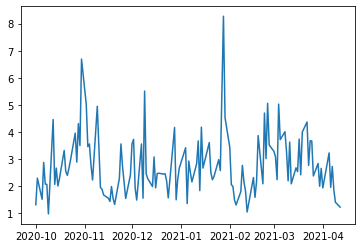

In [305]:
plt.plot (historico.volatilidad)